# Labolatorium 4 - Symulowane wyżarzanie

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Funkcją temperatury jest funkcja logistyczna: $\frac{L}{1+e^{-kx}}$. Funkcją prawdopodobeństwa akceptacji stanu o wyższej energi jest: $e^{\frac{-\Delta E}{T}}$ i stan o mniejszej energii jest zawsze akceptowany.

Uwagi do kodu: Z niewyjaśnionych mi przyczyn animacje nie działają w notebooku, wywołanie funkcji poza notebookiem pokazuje animacje.

## Zandanie 1 - Problem konwojażera
Funkcją energii jest suma długości odcinków między punktami. Sąsiedzi są generowani dwoma medodami zamiany pónków w kolejności ich odwiedzenia: dwa losowe punkty lub dwa sąsiednie punkty.

Najpierw zosatły wygenerowane 3 zbiory: punkty rozłożne rozkładem jednostajnym, punkty rozłożone rozkładem normalnym, 9 oddalonych od siebie gróp punktów. 

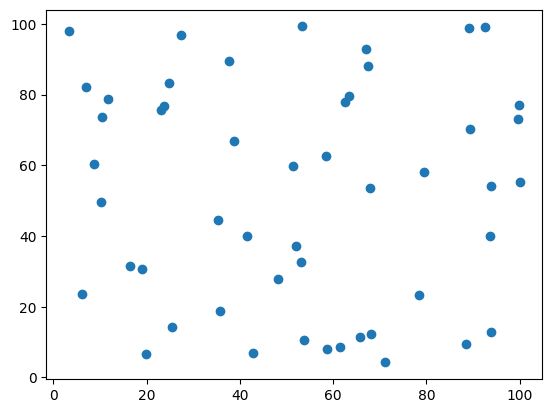

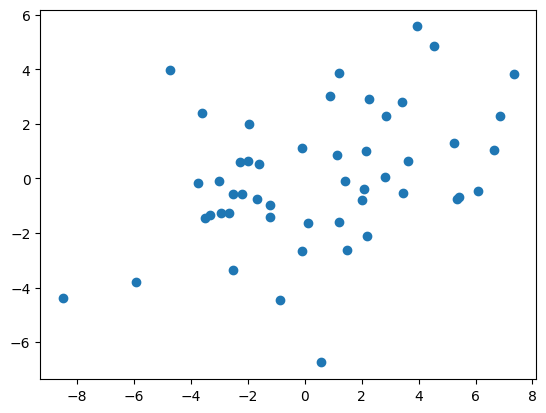

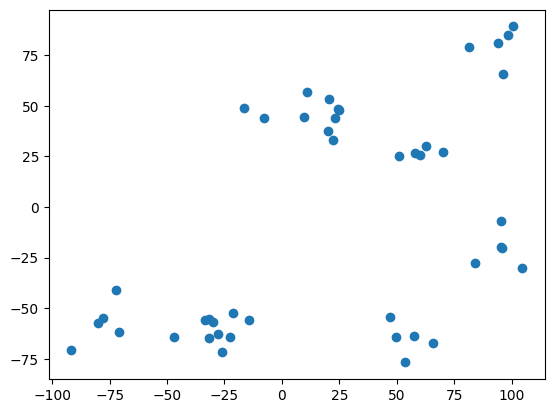

In [30]:
from zad1 import draw_path, generate_uniform_points, generate_normal_points, generate_9_groups, anealing_succ, anealing_rand

N = 50

uniform = generate_uniform_points(N, 0, 100)
normal = generate_normal_points(N, 10, 10, 10, 0)
groups = generate_9_groups(N, 20, -100, 100)

def draw_points(points):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x, y)
    plt.show()

draw_points(uniform)
draw_points(normal)
draw_points(groups)

Najpierw sprawdzam rozwiązania otrzymane kożystając z pierwszego sposobu generowania sąsiadów.

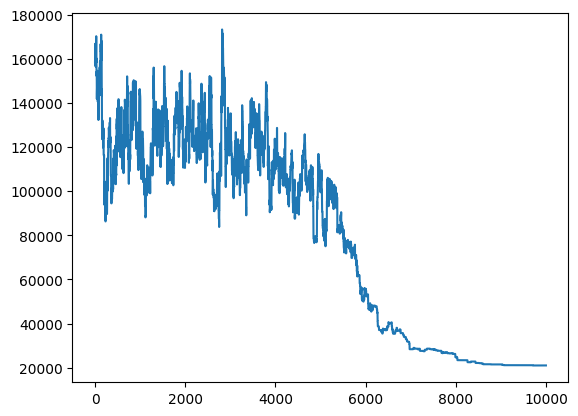

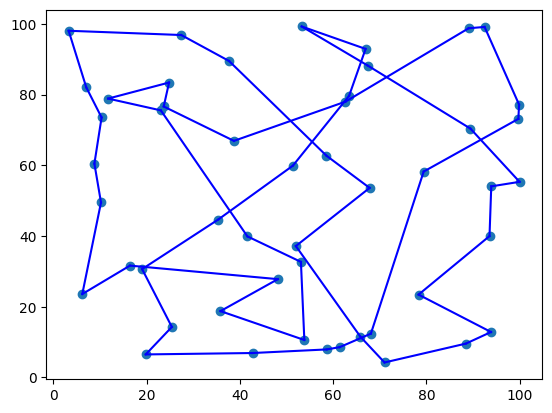

20974.199758974748


In [31]:
path, val = anealing_rand(N, 5000, 10000, uniform)
draw_path(uniform, path)
print(val)

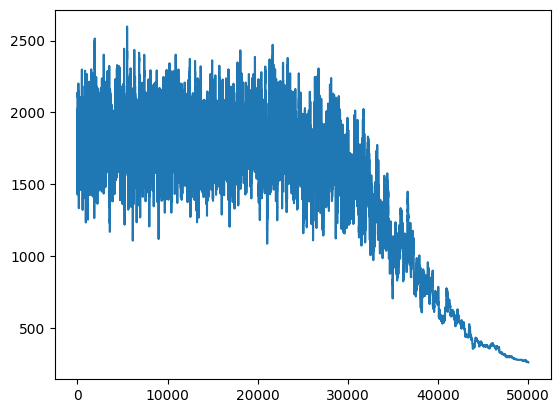

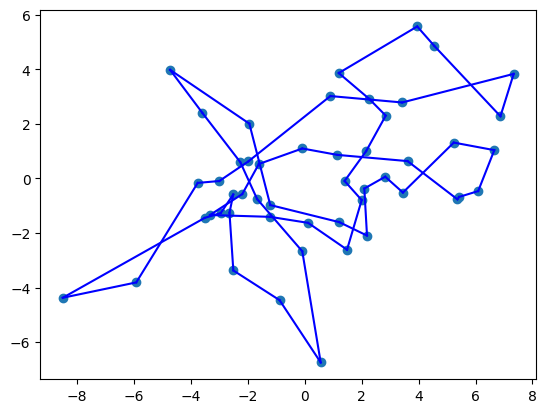

258.64279247011234


In [32]:
path, val = anealing_rand(N, 500, 50000, normal)
draw_path(normal, path)
print(val)

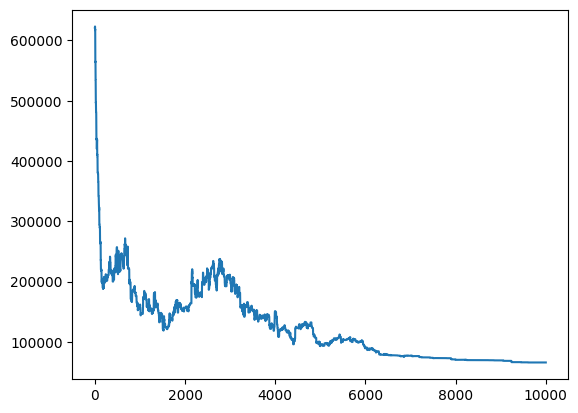

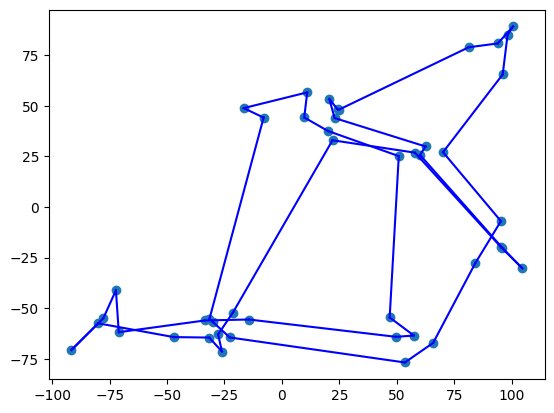

65780.24145713323


In [33]:
path, val = anealing_rand(len(groups), 5000, 10000, groups)
draw_path(groups, path)
print(val)

Można zauważyć że przy dziewięciu grupach na początku wartość energi spada dość szybko, jest to prawdopodobne spowodowane tym że algorytm znajduje duże optymalizacje natychmiastowo przez zamianę połączeń między grupami na o wiele bliższe.

Teraz sprawdzamy wariant z zamianą sąsiednich w kolejności punktów.

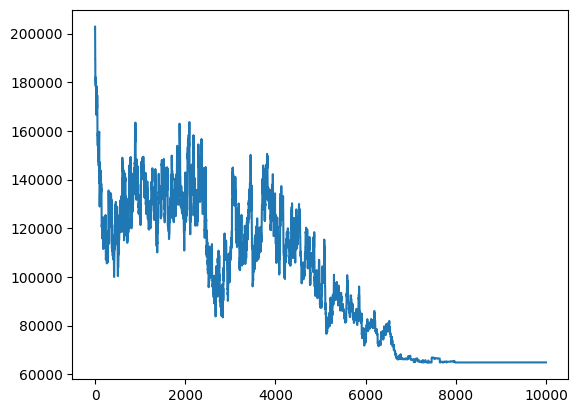

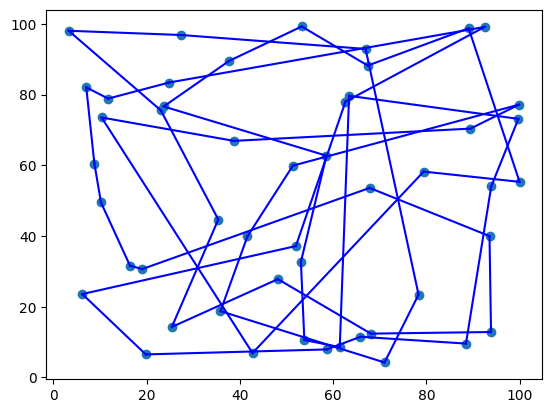

64879.26556629636


In [34]:
path, val = anealing_succ(N, 5000, 10000, uniform)
draw_path(uniform, path)
print(val)

Zauważamy że ten wariant oblicza gorsze rozwiązania od zamieniania w pełni losowego gdy inne paremtry są identyczne. Może to być spowodowane faktem że ta wersja jest bardzo zależna od początkowego stanu, jęsli będzie on zawierał dużo połaczeń dalekich od siebie punktów ta metoda nie zauważy lepszych rozwiązań.

## Zadanie 2 - obraz binarny

Generowanie sąsiadów:

"Sąsiadujący" obraz jest generowany przez zamianę miejsc dwóch pikseli o różnych kolorach.

Funkcje energii:

Zostały zaimplementowane 3 funkcje energii:
- Te same kolory się przyciągają (4 i 8 sąsiadów)
- Te same kolory w bezpośrednim sąsiedztwie się przyciągają a w dalszym odpychają (8 bliskich i 16 dalekich sąsiadów)
- Adaptacja modelu Isinga (4 i 8 sąsiadów)

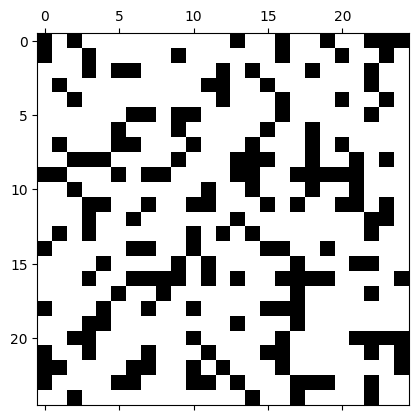

In [1]:
from zad2 import image_anneal, image_generator, display_image, animation_form_images

#Przykładowy obraz
display_image(image_generator(25, 0.3))

Najpierw porównany zostanie wpływ typu sąsiedztwa na wynik przy gęstości czaarnych punktów 0.4. Do sprawdzenia tego użyjemy pierwszej funkcji energii.

100%|██████████| 100000/100000 [00:21<00:00, 4677.52it/s]


6248


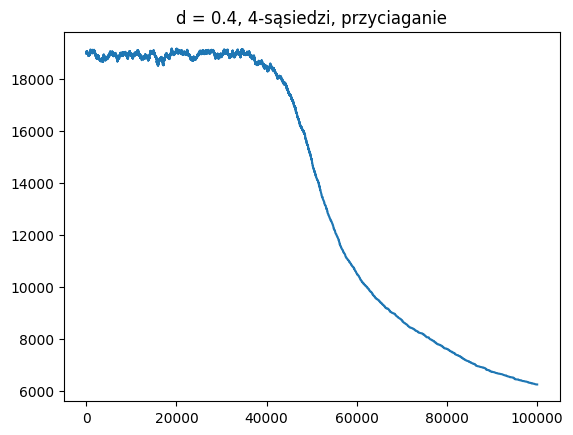

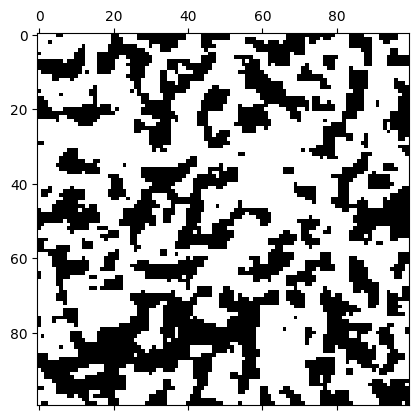

Prosessing...


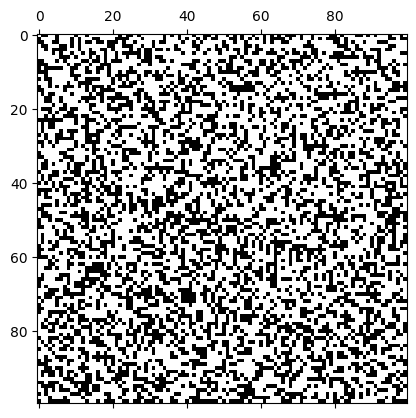

In [3]:
img, min_e, values, images = image_anneal(100, 0.4, 5230, 100000, 1, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.4, 4-sąsiedzi, przyciaganie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 100000/100000 [01:08<00:00, 1460.99it/s]


12476


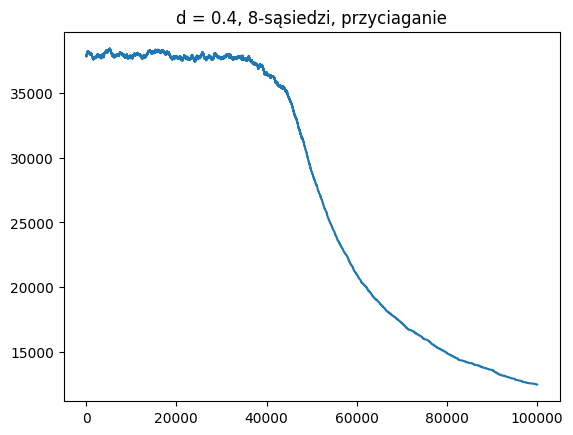

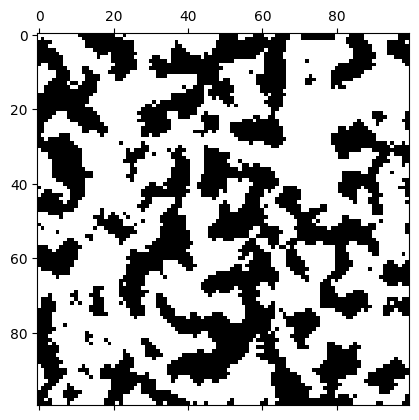

Prosessing...


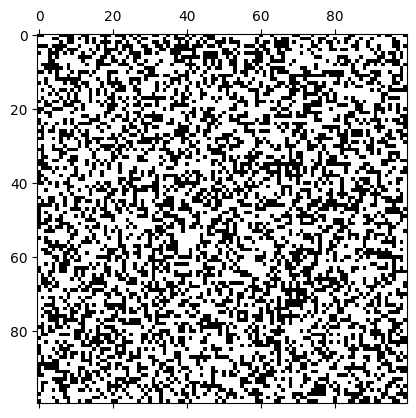

In [4]:
img, min_e, values, images = image_anneal(100, 0.4, 5230, 100000, 1, 2)
print(min_e)
plt.plot(values)
plt.title("d = 0.4, 8-sąsiedzi, przyciaganie")
plt.show()
display_image(img)
animation_form_images(images, False)

Grupy punktów wydają się być większe przy 8-sąsiedztwie

Następnie sprawdzimy jak wpływa na wyniki różna funkcja kosztu z tym samym typem sąsiedztwa. Zostanie do tego wykożystane 4-sąsiedztwo, 0.3 jako gęstość czarnych punktów. Testowanymi funkcjami energii będzią: opdychające się te same kolory oraz moja adaptacja modelu isinga ferromagetycznego i antyferromagnetyczny.

100%|██████████| 100000/100000 [00:30<00:00, 3271.13it/s]


5578


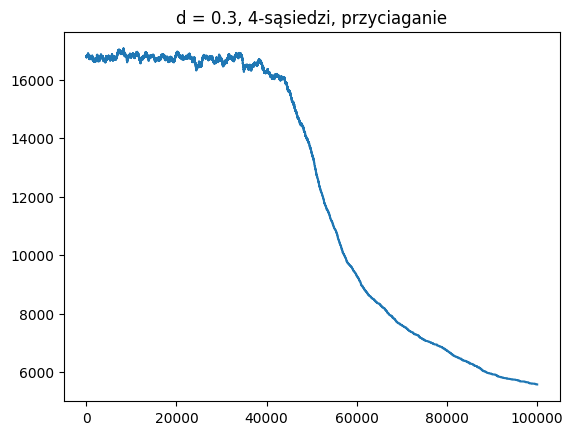

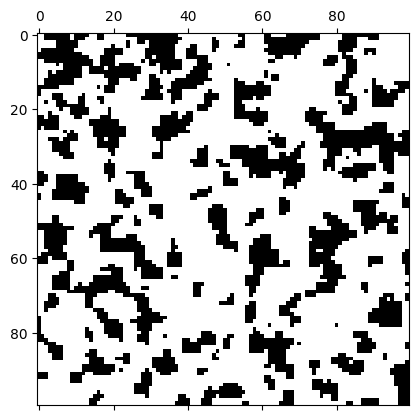

Prosessing...


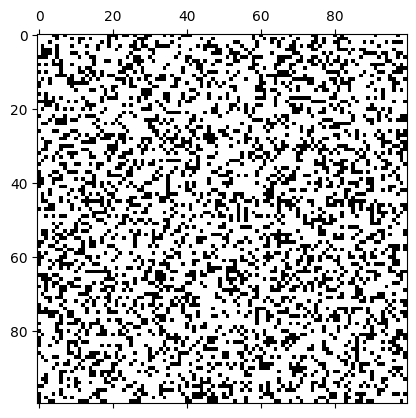

In [5]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 100000, 1, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 4-sąsiedzi, przyciaganie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 200000/200000 [01:01<00:00, 3258.78it/s]


-12518.0


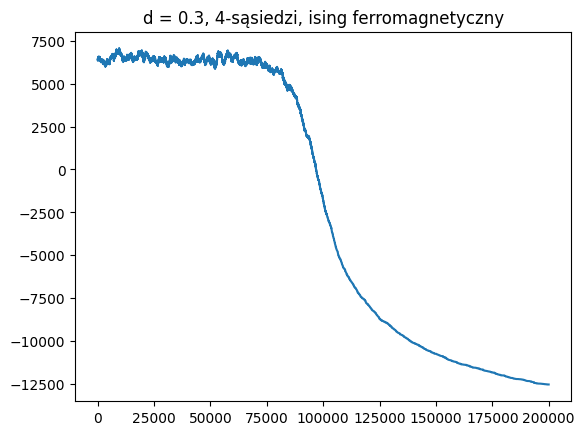

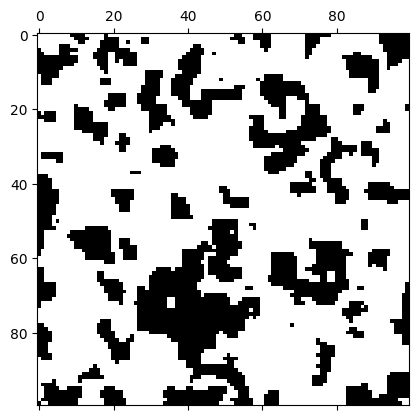

Prosessing...


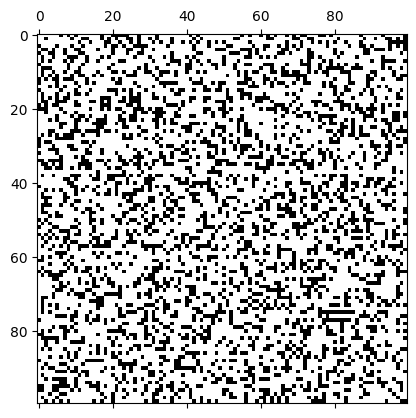

In [7]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 200000, 3, 1, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 4-sąsiedzi, ising ferromagnetyczny")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 100000/100000 [01:23<00:00, 1194.71it/s]


-21279.0


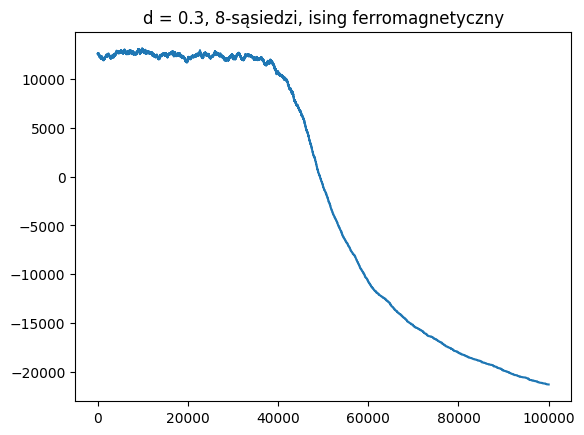

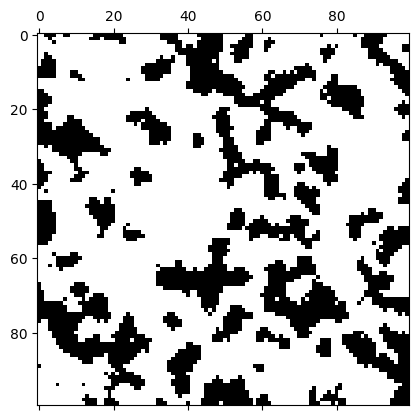

Prosessing...


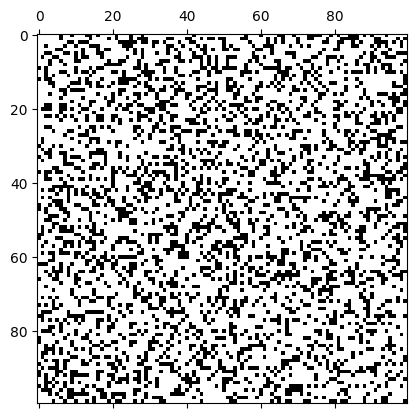

In [9]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 100000, 3, 2, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 8-sąsiedzi, ising ferromagnetyczny")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 100000/100000 [00:33<00:00, 2982.69it/s]


-17398.0


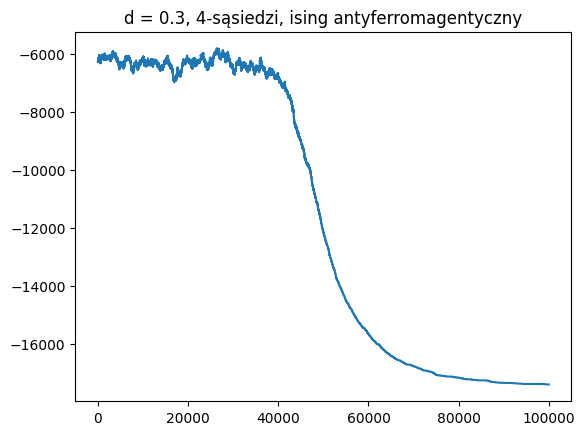

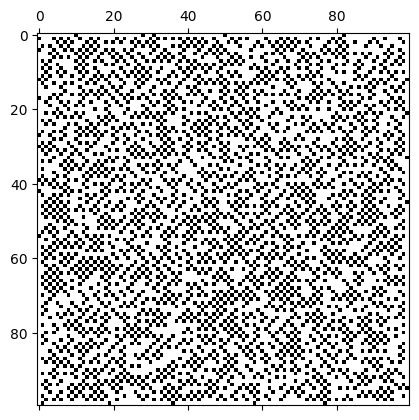

Prosessing...


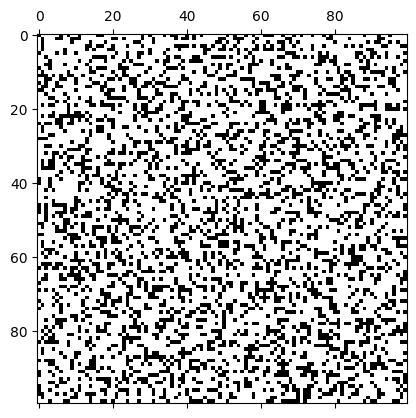

In [10]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 100000, 3, 1, -1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 4-sąsiedzi, ising antyferromagentyczny")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 100000/100000 [01:31<00:00, 1098.61it/s]


-28196.0


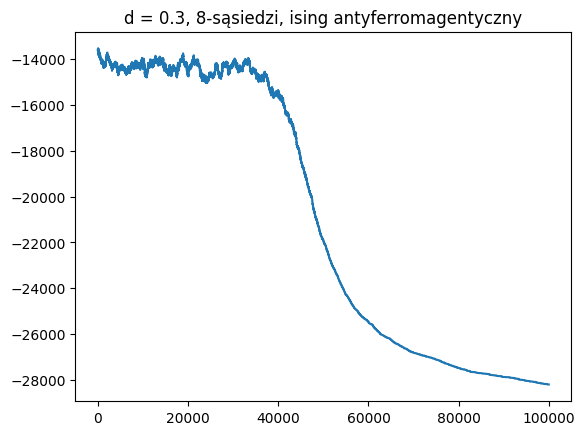

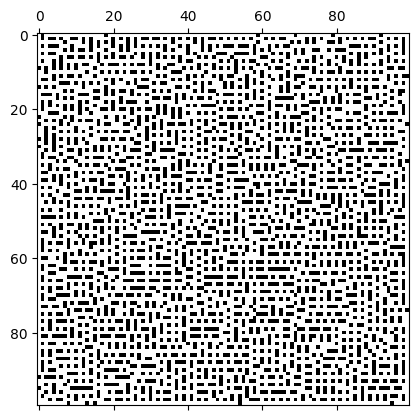

Prosessing...


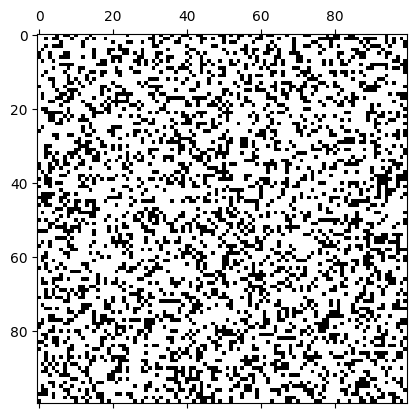

In [11]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 100000, 3, 2, -1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, 8-sąsiedzi, ising antyferromagentyczny")
plt.show()
display_image(img)
animation_form_images(images, False)

Można zauważyć że wzór który otrzymaliśmy z pierwszej wersji i isiga ferromagnetycznego są bardzo podobne. Bardzo ciekway jest przypadek isinga ferromagnetyczngo dzie punkty rozłożyły się równomiernie.

Następnie sprawdzony zostanie wpływ dystrbucji czarnych punktów na końcowy wynik. Użyjemy do tego fukcji energi przyciagającej i odpychającej.

100%|██████████| 100000/100000 [07:55<00:00, 210.49it/s]


118072


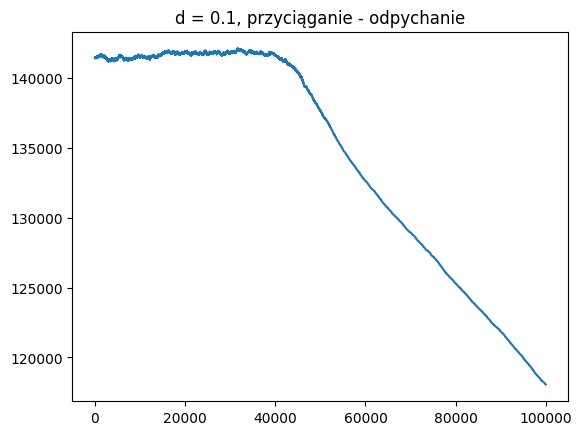

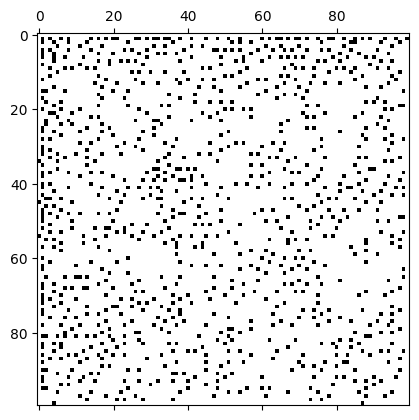

Prosessing...


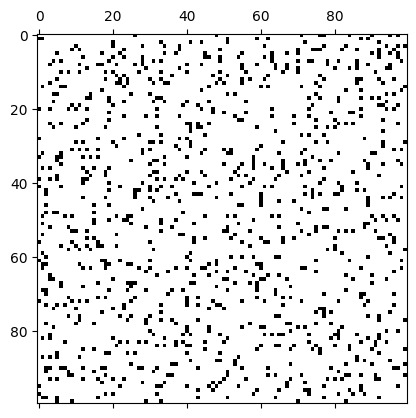

In [12]:
img, min_e, values, images = image_anneal(100, 0.1, 5230, 100000, 2, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.1, przyciąganie - odpychanie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 100000/100000 [09:42<00:00, 171.62it/s]


84644


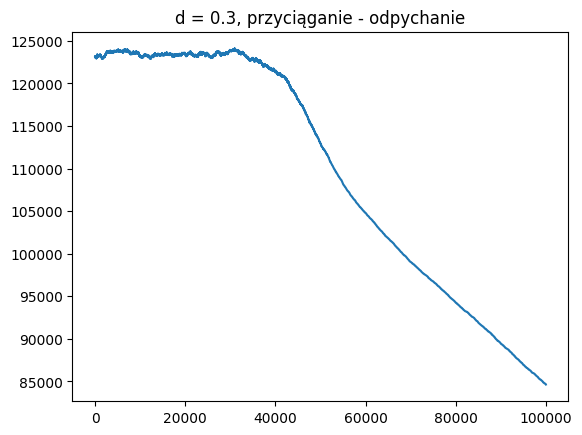

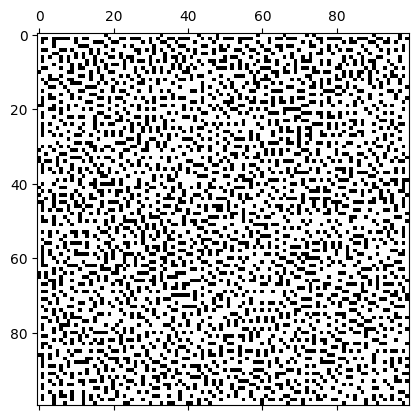

Prosessing...


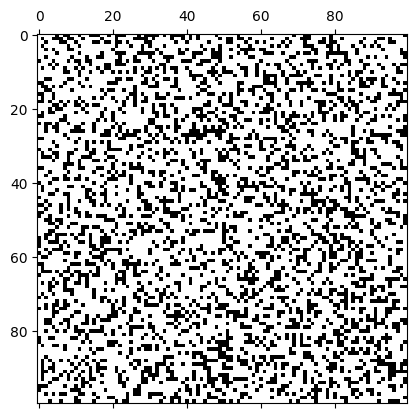

In [13]:
img, min_e, values, images = image_anneal(100, 0.3, 5230, 100000, 2, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.3, przyciąganie - odpychanie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 100000/100000 [09:02<00:00, 184.38it/s]


77463


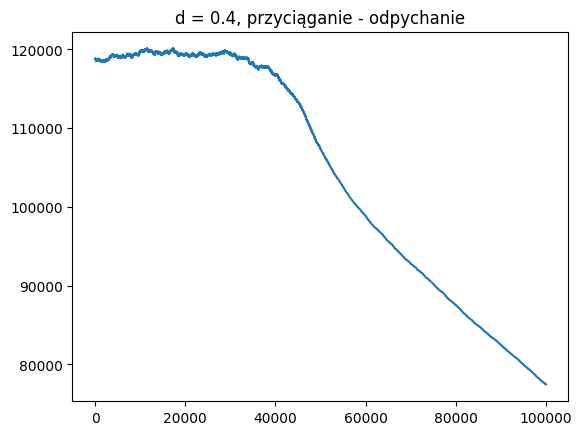

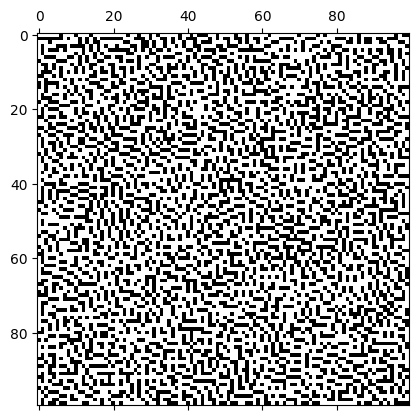

Prosessing...


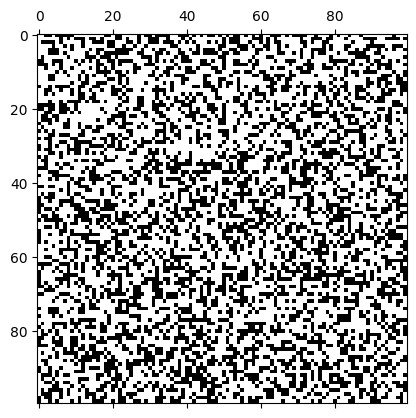

In [14]:
img, min_e, values, images = image_anneal(100, 0.4, 5230, 100000, 2, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.4, przyciąganie - odpychanie")
plt.show()
display_image(img)
animation_form_images(images, False)

100%|██████████| 500000/500000 [02:37<00:00, 3172.72it/s]


3352


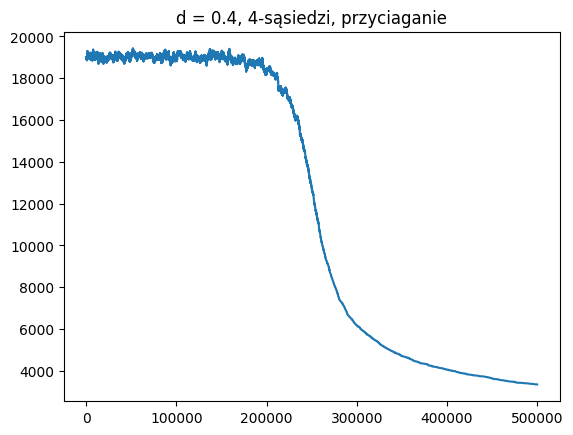

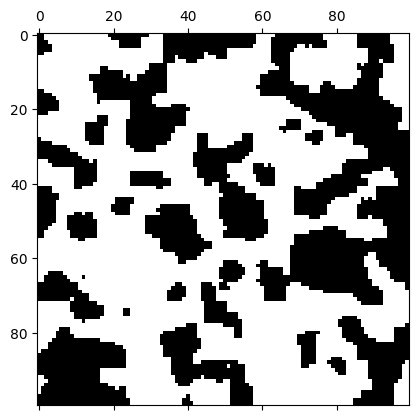

Prosessing...


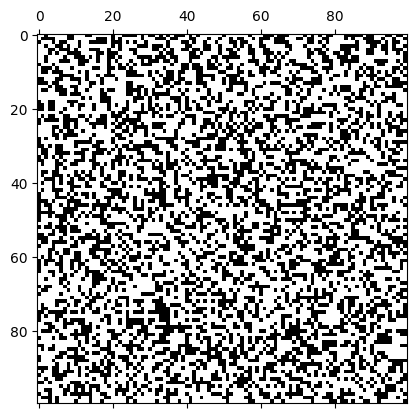

In [15]:
img, min_e, values, images = image_anneal(100, 0.4, 5230, 500000, 1, 1)
print(min_e)
plt.plot(values)
plt.title("d = 0.4, 4-sąsiedzi, przyciaganie")
plt.show()
display_image(img)
animation_form_images(images, False)

Regiony wydają się bardziej regularne przy użyciu tej funkcjii energii. Regiony czarnych punktów przypominają prostokąty. Można też zauważyć że energia systemu jest wyższa przy koncentracji 0.1 a najniższa przy 0.4. 

## Zadanie 3 - Sudoku
Przed rozpoczeciem symulowanego wyżarzania sudoku jest wczytywane z pliku. Następnie puste miejsca są wypełniane losowymi liczbami od 1 do 9, każda w takiej ilości aby ilość każdej była równa 9.

Sąsiednie sudoku są generowane przez zamianę dwóch liczb miejscami jeśli ta zamiana jeszcze nie została spróbowane z tego stanu i jeśli każda z nich nie została wprowadzona do programu.

In [7]:
from zad3 import read_sudoku, display_sudoku, anneal_sudoku

In [8]:
sudoku, fixed = read_sudoku("sudoku_easy.txt")
display_sudoku(sudoku)


8 3 4  4 4 5  9 2 7  
9 6 6  7 7 3  2 5 8  
1 5 6  1 2 1  3 1 9  

1 5 8  5 7 2  5 3 8  
7 8 5  9 3 8  6 4 7  
3 6 3  3 4 9  8 7 2  

2 3 1  9 6 1  4 6 9  
9 2 1  4 8 4  7 7 2  
5 6 4  5 2 6  9 8 1  


In [10]:
m, values = anneal_sudoku(sudoku, fixed, 100000, 5000)

 88%|████████▊ | 88131/100000 [01:08<00:09, 1282.73it/s]


0
Ilość danych liczb: 38


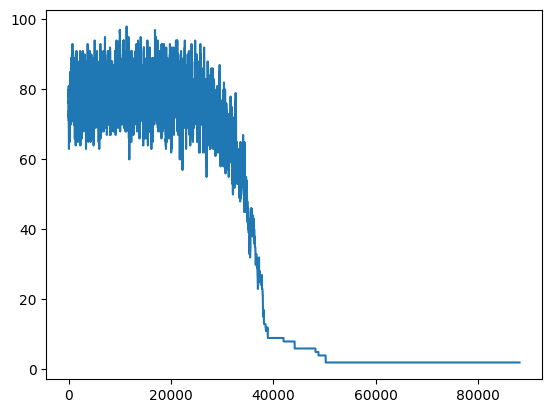


1 7 9  3 4 8  5 6 2  
6 8 4  9 2 5  7 3 1  
3 5 2  1 7 6  9 8 4  

5 6 1  2 8 4  3 7 9  
8 2 7  6 9 3  4 1 5  
4 9 3  7 5 1  6 2 8  

2 3 8  4 6 9  1 5 7  
7 4 6  5 1 2  8 9 3  
9 1 5  8 3 7  2 4 6  


In [11]:
print(m)
print("Ilość danych liczb:", len(fixed))
plt.plot(values)
plt.show()
display_sudoku(sudoku)

Gdy kilka razy uruchomiłem ten algorytm z tymi paramterami najcześciej znajdował on rozwiązanie tego sudoku między 30 000 a 60 000 iteracjii. Następnie sprawdzimy jak algoryt poradzi sobie z trudniejszą planszą.

In [ ]:
sudoku, fixed = read_sudoku("sudoku_hard.txt")
display_sudoku(sudoku)


3 2 3  7 7 6  7 7 9  
1 6 9  5 6 5  1 8 6  
7 4 2  8 4 5  2 5 5  

2 5 8  4 9 7  6 6 6  
2 9 5  3 4 3  8 6 4  
7 9 1  7 2 4  3 4 5  

5 9 2  1 8 1  2 9 8  
8 8 8  2 9 1  1 1 4  
1 4 3  6 9 3  3 3 7  


In [ ]:
m, values = anneal_sudoku(sudoku, fixed, 100000, 5000)

 65%|██████▍   | 64907/100000 [00:50<00:27, 1290.50it/s]


0
Ilość danych liczb: 22


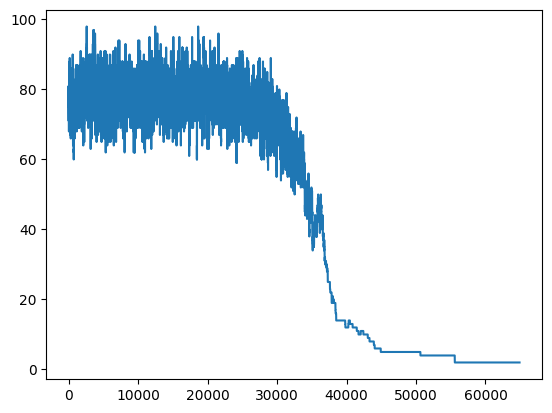


6 8 3  4 9 5  7 2 1  
7 4 2  1 8 3  6 9 5  
1 5 9  2 6 7  4 3 8  

2 9 4  7 1 6  8 5 3  
3 1 6  5 2 8  9 4 7  
8 7 5  9 3 4  2 1 6  

9 2 7  6 5 1  3 8 4  
4 3 1  8 7 2  5 6 9  
5 6 8  3 4 9  1 7 2  


In [ ]:
print(m)
print("Ilość danych liczb:", len(fixed))
plt.plot(values)
plt.show()
display_sudoku(sudoku)

Można zauważyć że algorytm potrzebuje podonej ilości iteracji aby rozwiązać tródne i łatwe sudoku. Można z tego wnioskować że algorytm nie jest spoalniany przez przeszkody dla ludzi. Aby to sprawdzić spróbujemy rozwiązać sudoku o najmniejszej ilości wskazówek, 17.

In [12]:
sudoku, fixed = read_sudoku("sudoku_extreme.txt")
display_sudoku(sudoku)


7 6 9  8 7 1  6 8 3  
8 8 3  8 2 4  4 3 3  
5 4 9  4 9 3  7 6 8  

8 3 2  7 7 9  8 8 2  
6 3 4  7 5 1  1 7 9  
2 2 5  7 3 1  4 1 6  

6 4 5  5 4 6  9 7 5  
6 2 3  4 2 9  9 1 5  
9 1 1  2 1 5  6 2 5  


In [13]:
m, values = anneal_sudoku(sudoku, fixed, 100000, 5000)

 70%|███████   | 70225/100000 [00:47<00:19, 1491.80it/s]


0
Ilość danych liczb: 17


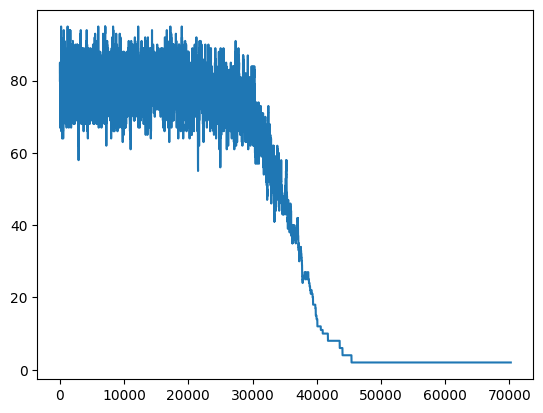


4 6 1  3 7 8  5 2 9  
5 3 7  9 4 2  1 6 8  
2 9 8  1 6 5  3 7 4  

3 7 2  5 9 6  4 8 1  
1 4 9  2 8 3  6 5 7  
8 5 6  7 1 4  2 9 3  

6 2 4  8 3 7  9 1 5  
7 1 3  6 5 9  8 4 2  
9 8 5  4 2 1  7 3 6  


In [14]:
print(m)
print("Ilość danych liczb:", len(fixed))
plt.plot(values)
plt.show()
display_sudoku(sudoku)

Algorytm rozwiązał najtrudniejsze sudoku możliwe w podobnej liczbie iteracji co reszta. Potwierdza to tezę że algorytmowi nie przeszkadzają przeszkody zaprojektiwane dla ludzi.